### Matplotlib subplots demo - working with axes and figures
https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

%matplotlib inline

### First, let's create some data to plot

In [2]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

In [3]:
print(len(x))
print(type(x))

400
<class 'numpy.ndarray'>


In [4]:
print(len(y))
print(type(y))

400
<class 'numpy.ndarray'>


#### One figure and one subplot (ax) - this returns a tuple (fig, ax) and we see the default fig size and number of axes

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

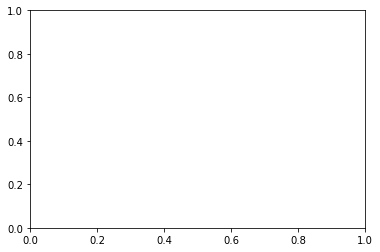

In [5]:
plt.subplots()

#### Next _unpack_ the tuple returned by `plt.subplots()` into two variables
 - fig
 - ax   

#### You can specify the `figsize` as an argument to `plt.subplots()` to set the dimensions of the plotting area
##### Remember `ax` refers to a plot within the plotting area (or `fig`) 
 - you can use it in the way you would use `plt` for a simple plot

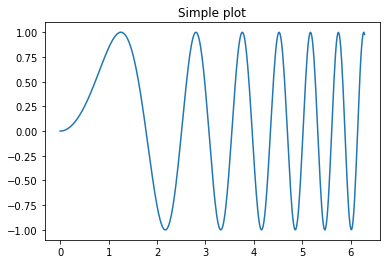

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y)
ax.set_title('Simple plot');

### Two subplots with a shared x-axis

#### This time you will unpack fig and ax into `f` (figure: the plotting area) and `ax_array` an array of axes (plots). You will pass 2 arguments to `plt.subplots()` 
- `nrows = 2` to specify 2 subplots in 2 rows 
- and `sharex=True` to tell matplotlib that the plots will _share_ a single x-axis

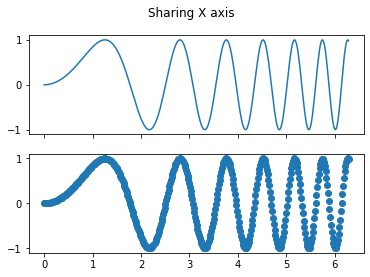

In [7]:
f, ax_array = plt.subplots(nrows = 2, sharex=True)
f.suptitle('Sharing X axis')
ax_array[0].plot(x, y)
ax_array[1].scatter(x, y);

### Two subplots with a shared y-axis 
#### This time your plots will be to drawn in 1 row and 2 columns.    
#### Notice you are unpacking the axes into a tuple with the names specified this time (`ax1` and `ax2`).

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey=True)
f.suptitle('Sharing Y axis')
ax1.plot(x, y)
ax2.scatter(x, y);

### Change the example above to plot the scatterplot on the left and the line plot on the right?

#### Also, notice how matplotlib has retained the figsize specified in the first plot.
 - Change the figure size to be 8 x 6 now.

### Three subplots sharing both the x and y axes

#### In this example, we unpack `plt.subplots()` into `f` (the figure) and `axarr` an array of the axes.
 - plot the three sublots so that each is in its own row
 - set `sharex` and `sharey` to true to have a single (shared) x axis and a single (shared) y axis

In [ ]:
f, axarr = plt.subplots(nrows = 3, sharex=True, sharey=True)
f.suptitle('Sharing both axes')
axarr[0].plot(x, y)
axarr[1].scatter(x, y)
axarr[2].scatter(x, 2 * y ** 2 - 1, color='r');

# Bring subplots close to each other.
#f.subplots_adjust(hspace=0)

# # Hide x labels and tick labels for all but bottom plot.
# for ax in axarr:
#     ax.label_outer();

### Creating plots in a grid with shared row and column axes

#### Plot 4 sublots in a 2 x 2 grid
 - unpack `plt.subplots()` into `f` and a tuple with the four axes, paired row-wise
 - set `sharex = col` to share an x aaxis for each column in the grid
 - set `sharey = row` to share a y axis for each row in the grid

In [ ]:
f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r');

#### Creating new data to demo `ax.twinx()`
- in general avoid dual axes using them is the best way to show something in the data!!

In [ ]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

#### First we'll plot `data1` in red 

In [ ]:
fig, ax1 = plt.subplots()

color = 'darkgreen'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color);

#### Next we plot it again and add the second plot from `data2` in blue

In [ ]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'blue'
ax2.set_ylabel('sin', color=color2)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout();  # otherwise the right y-label is slightly clipped

#### `matplotlib.pyplot` is the plotting library underlying `pandas` plots and `geopandas` plots

In [ ]:
school_districts = gpd.read_file('../data/school_districts.geojson')
school_districts.head(2)

### First plot the school districts with no polishing

In [ ]:
school_districts.plot();

### Next color the polygons according to the `district`
 - set the column argument = to a column in the dataset you want to color by (here we choose `district`)

In [ ]:
school_districts.plot(column = 'district');

### You can make the colors a bit calmer 
 - to define distinct regions (which are categorical) you want a [qualitative colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

In [ ]:
school_districts.plot(column = 'district', cmap = 'Set3');

### To set `figsize()` you can add that argument to your call to `.plot()`

In [ ]:
school_districts.plot(column = 'district', cmap = 'Set3', figsize = (8,8));

### To perform further tweaking with more control we can switch to the syntax that uses `fig` and `ax`

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', cmap = 'Set3');

### We can add a legend by passing in `legend = True` to `.plot()` 

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', 
                      cmap = 'Set3', legend = True);

#### Setting [`legend_kwds`](https://matplotlib.org/3.1.1/api/legend_api.html) allows you to style the legend and calling `plt.title()` adds a title.

In [ ]:
leg_kwds = {'title': 'School District', 'loc': 'best', 
            'bbox_to_anchor': (1, 1), 'ncol': 1}
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', cmap = 'Set3', legend = True, 
                      legend_kwds = leg_kwds)
plt.title('Nashville School Districts')
plt.savefig('school_districts.png');

### Another option if our regions are large enough is adding [annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) to the plot to label them
#### We'll iterate through `school_districts` and use the `centroid` property of a `geometry` to put the label in the middle of each polygon

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
school_districts.plot(ax = ax, column = 'district', cmap = 'Set3')

for index, row in school_districts.iterrows():
    plt.annotate(text=row['district'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold')
    
plt.title('Nashville School Districts');

### Other visualization libraries to check out:
 - [seaborn](https://seaborn.pydata.org/)
     - [DataCamp tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
 - [altair](https://altair-viz.github.io/)
     - [Jake Vanderplas tutorial](https://github.com/altair-viz/altair-tutorial)

### Slide deck on [the grammar of graphics](https://www.slideshare.net/DaryaVanichkina1/grammar-of-graphics-darya-vanichkina)